# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

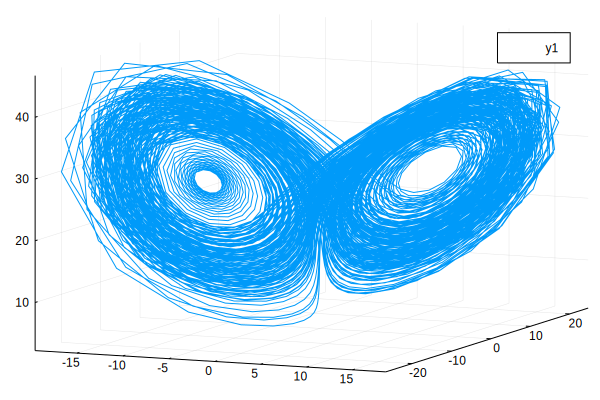

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

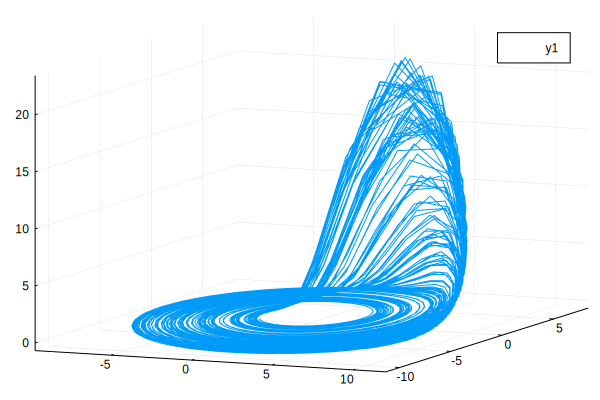

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

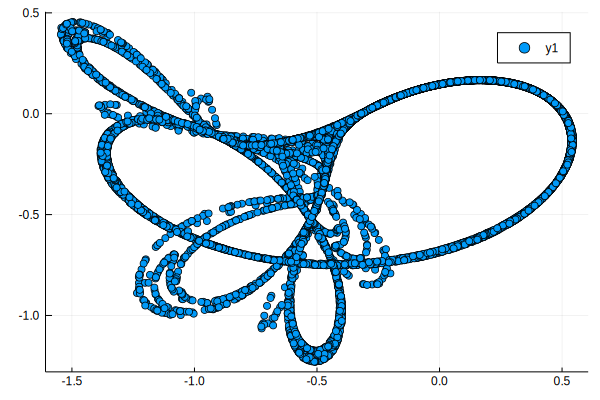

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.13223   -0.024535   0.057758  …  -0.112852  -0.532722  -0.151833
 -0.392635  -0.323745  -0.143537     -0.978662  -0.48934   -0.704206

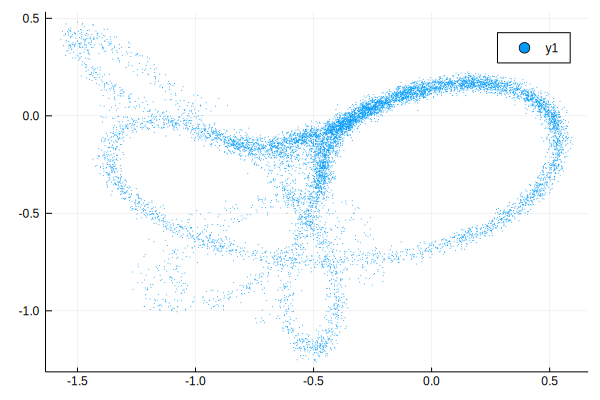

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

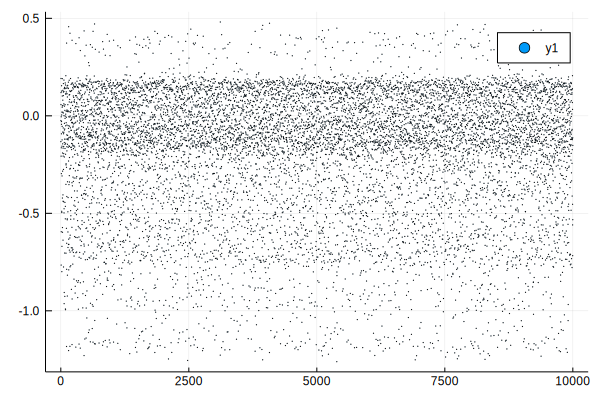

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [225]:
z=itmap(logistic,1/π,10^4);

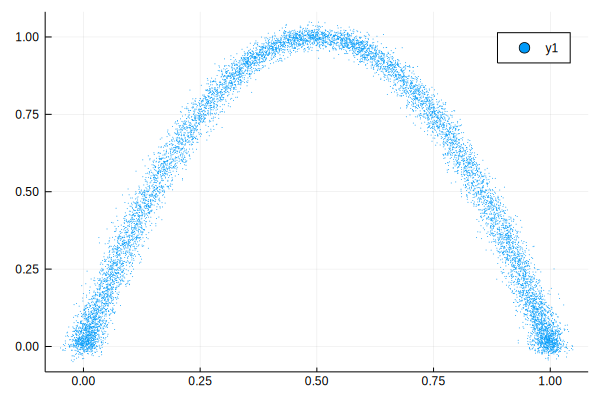

In [254]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [381]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [139]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [382]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => ([0,1],[0,1,2]),#([0],[0,1],[0,1,2],[0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Model30,
    "nneighbours"=>1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(-nk * (nk <= 30))
  "stopstep"    => 10
  "embedding"   => ([0, 1], [0, 1, 2])
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [383]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=3, nx=7999
needδ=false
*MSS=0.12390332783913097 DL=-1 size=1
MSS=0.22826385278114822 DL=-1 size=1
*MSS=0.09503353267570283 DL=-2 size=2
*MSS=0.07900837295540089 DL=-3 size=3
MSS=0.018482239320436376 DL=-3 size=3
*MSS=0.011268952021558297 DL=-4 size=4
*MSS=0.009282018337312868 DL=-5 size=5
*MSS=0.009153558530256857 DL=-6 size=6
MSS=0.008777077594144042 DL=-6 size=6
*MSS=0.008484337362380088 DL=-7 size=7
MSS=0.006541202984702817 DL=-7 size=7
MSS=0.006527784064551566 DL=-7 size=7
*MSS=0.0064437194846939045 DL=-8 size=8
MSS=0.0062249212996838684 DL=-8 size=8
*MSS=0.006185626527244155 DL=-9 size=9
*MSS=0.006183039304231424 DL=-10 size=10
MSS=0.004632595949706666 DL=-10 size=10
*MSS=0.004627983147229502 DL=-11 size=11
MSS=0.004613771499140596 DL=-11 size=11
*MSS=0.004609161353719633 DL=-12 size=12
MSS=0.004613259946164541 DL=-12 size=12
*MSS=0.004607282176485494 DL=-13 size=13
MSS=0.004611587203518063 DL=-13 size=13
*MSS=0.004605758550845729 DL=-14 size=14
MSS=0.004608473148511552 DL=-14 

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 1], 0.8146383421823152, [0.40513011829097945 0.7703305493104402 … 0.1796547482177071 0.6127928673473508; 0.8938487627168973 0.2806386657640248 … 0.9974255725429539 0.1781806940682658], [4.595837374532589]), Main.Place.BasisFunc(tophat, [0, 1], 0.4329276107208459, [0.40513011829097945 0.7703305493104402 … 0.1796547482177071 0.6127928673473508; 0.8938487627168973 0.2806386657640248 … 0.9974255725429539 0.1781806940682658], [4.274446463821752]), Main.Place.BasisFunc(tophat, [0, 1], 0.6705294120497151, [0.40513011829097945 0.7703305493104402 … 0.1796547482177071 0.6127928673473508; 0.8938487627168973 0.2806386657640248 … 0.9974255725429539 0.1781806940682658], [4.875911770673833]), Main.Place.BasisFunc(tophat, [0, 1], 0.2252419933463327, [0.40513011829097945 0.7703305493104402 … 0.1796547482177071 0.6127928673473508; 0.8938487627168973 0.2806386657640248 … 0.9974255725429539 0.1781806940682658], [4.514147590458775

Modelling done, we can make one-step predictions on time series data

In [ ]:
yt,yp,ep = Place.predict(mymodel, z);

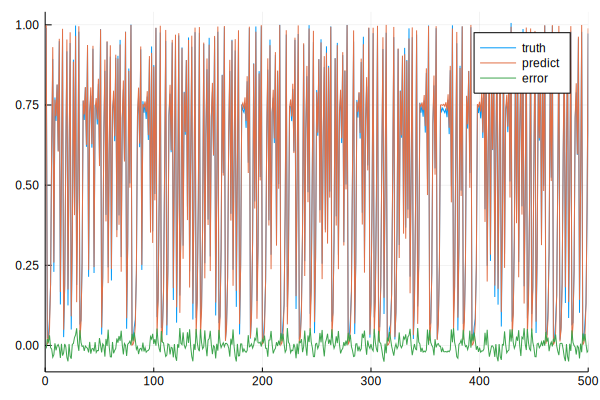

In [385]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [388]:
yp, yt = Place.freerun(mymodel,zn,500)

([0.9527109162441864, 0.19070224626400512, 0.6061050047767741, 0.9248898382734985, 0.2665689034544203, 0.7974901357510458, 0.6340544992838939, 0.9364780341707476, 0.21382275921988758, 0.7027895393041982  …  0.06597671106233371, 0.2353967621352254, 0.7350995222046943, 0.7486288937027701, 0.7681977523311385, 0.6764756035189562, 0.8932291854913966, 0.40884897789797514, 0.9650843296518326, 0.18854258979811256], [0.9945017876287789, 0.012729481368033651, 0.041977709398463126, 0.06259296719092912, 0.21213771057038508, 0.6387903445318903, 0.92645022594019, 0.2500120303555604, 0.7576131152125021, 0.7116155692854833  …  0.8507555281746294, 0.50585491747988, 0.9671511790075933, 0.025941819144298023, 0.06986492227606099, 0.21347776792715473, 0.7254684226868648, 0.7926557284113017, 0.6445598526890239, 0.9220218074833288])

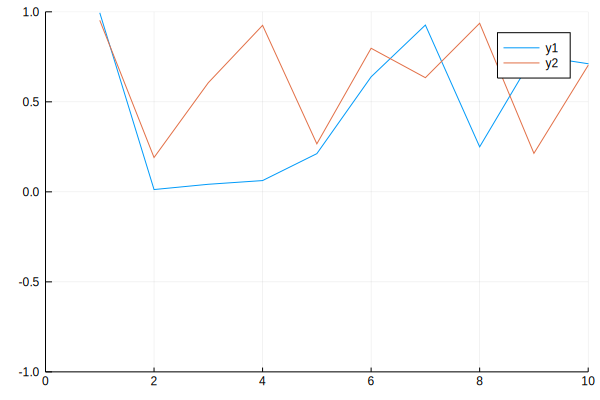

In [395]:
plot(yt)
plot!(yp,ylimit=(-1,1),xlimit=(0,10))


## Michael Small

Last updated 12/7